# QF 627 Extras - Financial Analytics
## Lesson 8 | Instrumental Variables (IV)

> Hi, Team 👋 Thank you for opening the script 🙂

## DEPENDENCIES

In [1]:
# Load libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

# Set print options

np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

# Define our customized timer function

def countdown(Time):
    
    while Time:
        minutes, seconds = divmod(Time, 60)
        timer = "{:02d}:{:02d}".format(minutes, seconds)
        
        print(timer, end = "\r")
        time.sleep(1)
        Time -= 1
        
    print("Let us solve the problem above together :)")

## 👉 <a id = "top">Learning Pointers</a> 👈 

## [1. How Instrumental Variables (IV) Help Causal Inference](#p1)

> ### <font color = red> Learn with the Classic Econometric Solution </font>

## [2. Revisiting IV](#p2)

> ### <font color = red> Further Application of IV </font>

## [3. Further Learning on Instrumental Variable](#p3)

> ### <font color = red> Chapter 8 from of the Textbook </font>

## [4. What We Learned & What's Next](#p4)

> ### <font color = red> Revisiting Learning Pointers </font>

## <a id = "p1">1. </a> <font color = "green"> How Instrumental Variables (IV) help Causal Inference </font>  [back to table of contents](#top)

### Analytics Contexts

* When analyzing the effect of `military service` (`X`) on `lifetime earnings` (`Y`), a simple regression analysis might not yield accurate causal inferences due to selection bias. The decision to serve in the military is not random and might be influenced by various factors that also affect earnings. To address this issue, the Instrumental Variables (IV) approach is used.

### How to Use Instrumental Variables (IVs)

> In the IV approach, we use a variable that is correlated with the treatment (military service) but not directly with the outcome (lifetime earnings). In the class econometric study of Joshua Angrist, the random assignment of draft lottery numbers based on birthdates was used as an instrumental variable.

### Import

> We will use data set something similar to the data tht was to analyzed for the class econometric solution of IV on causal inference.

In [2]:
df =\
(
    pd
    .read_csv("https://talktoroh.com/s/iv_data.csv")
)

### WRANGLE

In [3]:
df.head(10)

,Unnamed: 0,draft_number,military_service,lifetime_earnings
0,0,0,0.034176,63700.924846
1,1,1,1.187617,89367.453646
2,2,0,0.095042,52220.889167
3,3,0,-0.057690,41312.013985
4,4,0,-0.089841,52802.892087
5,5,1,1.049192,64206.684645
6,6,0,-0.132023,67493.406061
7,7,0,0.183146,55028.270843
8,8,0,0.117944,48705.664728
9,9,1,0.953082,70908.451754


### MODEL

#### Step-by-Step Unpacking of Instrumental Variable Approach

* `Problem`: Simple OLS Regression

> First, let's perform a simple OLS regression to see the effect of military service on earnings.

In [4]:
# OLS regression

ols_model =\
(
    sm
    .OLS(df["lifetime_earnings"], 
         sm.add_constant(df["military_service"])
        )
    .fit()
)

ols_model \
    .summary() \
    .tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.063e+04,442.056,114.522,0.000,4.98e+04,5.15e+04
military_service,1.952e+04,610.945,31.954,0.000,1.83e+04,2.07e+04


> The results of the simple OLS regression might not be reliable because the decision to serve in the military is not random, leading to potential selection bias.

* `Solution`: Two-Stage Least Squares (2SLS) Using Instrumental Variables
    
> Now, let's use the draft number as an instrumental variable to perform 2SLS.

> In the first stage, we regress the endogenous variable (military service) on the instrument (draft number). This provides us with the predicted values of military service, which are purged of endogeneity because they are based on the exogenous instrument.

In [5]:
# First stage: Explain military service using the instrumental variable

first_stage =\
(
    sm
    .OLS(df["military_service"], 
         sm.add_constant(df["draft_number"])
        )
    .fit()
)

df["predicted_service"] =\
(
    first_stage
    .predict(sm.add_constant(df['draft_number'])
            )
)

> In the second stage, we use these predicted values from the first stage to regress the dependent variable (lifetime earnings). This ensures that the variation in military service used to explain lifetime earnings is exogenous, thus providing an unbiased and consistent estimate of the causal effect.

In [6]:
# Second stage: Explain earnings using the predicted military service

second_stage =\
(
    sm
    .OLS(df["lifetime_earnings"], 
         sm.add_constant(df["predicted_service"])
        )
    .fit()
)

> The results obtained from the 2SLS method using the instrumental variable are more reliable than those from the simple OLS regression.

> The instrumental variable ensures that the variation in military service is exogenous, allowing for a causal inference.

#### Why the Draft Number Helps in Causal Inference

#### Instrumental Variable Conditions

> An instrumental variable (IV) must satisfy two main conditions to be valid:

* `Relevance`: The IV must be correlated with the endogenous explanatory variable (military service in this case). The draft number must influence the likelihood of military service.

* `Exogeneity`: The IV must not be correlated with the error term in the outcome equation. 

    > In other words, the draft number should not directly affect lifetime earnings except through its effect on military service.

#### When these conditions are met, the IV helps to overcome the endogeneity problem and allows for causal inference.

    Relevance

    > Draft numbers were randomly assigned to males born on different dates. Individuals with low draft numbers were more likely to be drafted into the military, while those with high draft numbers were less likely. Therefore, the draft number is strongly correlated with the likelihood of military service.

    > For example, individuals with draft numbers between 1 and 100 were mostly drafted, while those with numbers between 300 and 365 were mostly not drafted. This means the draft number is a good predictor of military service.

    Exogeneity

    > Because draft numbers were randomly assigned, they are not related to other personal characteristics (e.g., education level, family background, prior income level). This ensures that the draft number does not directly affect lifetime earnings. The draft number affects earnings only through its impact on military service.

    > Therefore, the draft number can be considered an exogenous variable, allowing us to estimate the causal effect of military service on lifetime earnings.

### Unpacking Causal Inference Process 

### Stage 1: Predicting Military Service

> We use the instrumental variable (draft number) to predict military service. This extracts the exogenous variation in military service.

```python
first_stage =\
(
    sm
    .OLS(df["military_service"], 
         sm.add_constant(df["draft_number"])
        )
    .fit()
)

df["predicted_service"] =\
(
    first_stage
    .predict(sm.add_constant(df['draft_number'])
            )
)


In [7]:
df

,Unnamed: 0,draft_number,military_service,lifetime_earnings,predicted_service
0,0,0,0.034176,63700.924846,0.004618
1,1,1,1.187617,89367.453646,1.003439
2,2,0,0.095042,52220.889167,0.004618
3,3,0,-0.057690,41312.013985,0.004618
4,4,0,-0.089841,52802.892087,0.004618
...,...,...,...,...,...
995,995,0,-0.048791,39452.668035,0.004618
996,996,0,0.215731,57752.495242,0.004618
997,997,1,0.939429,68302.046638,1.003439
998,998,1,1.074210,71812.160698,1.003439


### Stage 2: Predicting Earnings Using Predicted Military Service

In the second stage, we use the predicted values of education from the first stage to estimate the effect on wages.

```python

second_stage =\
(
    sm
    .OLS(df["lifetime_earnings"], 
         sm.add_constant(df["predicted_service"])
        )
    .fit()
)

In [8]:
second_stage \
    .summary() \
    .tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.056e+04,452.395,111.759,0.000,4.97e+04,5.14e+04
predicted_service,1.965e+04,631.302,31.127,0.000,1.84e+04,2.09e+04


### Now, with this understanding, let's revisit the lecture note from our LESSON 5.

#### How to INTERPRET?

> The coefficient obtained from the second stage of 2SLS represents the causal effect of military service on lifetime earnings. This estimate is more reliable than that from a simple OLS regression because it addresses the endogeneity issue.

    Key Points and Considerations

* `Weak Instruments`: One of the most important things to worry about when using IV is that your instrument is sufficiently correlated with your endogenous variable. This is often assessed using the F-statistic from the first-stage regression, which should be `at least 10` (`preferably 12`) to indicate a strong instrument.

* `Local Average Treatment Effect` (`LATE`): IV estimates the local average treatment effect, which is the average effect for individuals whose treatment status is influenced by the instrument. This may differ from the average treatment effect for the entire population.

* `Standard Errors`: When using a `two-stage` least squares (`2SLS`) approach, it's important to adjust for the correct standard errors. Using built-in functions like `IV2SLS` in statsmodels ensures that the standard errors are computed correctly.

> Instrumental variables (IV) are a powerful tool for addressing endogeneity in causal inference. By carefully choosing and validating instruments, researchers can make credible causal inferences even when simple regression methods would fail.

> However, the validity of IV estimates relies heavily on the strength and appropriateness of the instruments used, making it crucial to assess and validate instruments rigorously.

## <mark>The Big Picture :)</mark>

In [9]:
def would_you_recommend_causal_inference_method():
    print("Welcome to the Causal Inference Recommender architected by Prof. Roh :)")
    print("Please answer the following questions with either 'yes' or 'no'.\n")

    # Question 1. RCT Feasibility
    can_randomized = (
        input("Question 1: Can we RANDOMIZE the treatment assignment? (yes / no): ")
        .strip()
        .lower()
    )
    if can_randomized == "yes":
        print("\nRecommended Method: **RCTs (Randomized Controlled Trials)**")
        return

    # Question 2. Threshold for RDD
    has_threshold = (
        input(
            "Question 2: Is there a threshold that assigns treatment (e.g., cut-off)? (yes / no): "
        )
        .strip()
        .lower()
    )
    if has_threshold == "yes":
        print("\nRecommended Method: **RDD (Regression Discontinuity Design)**")
        return

    # Question 3. Check for Panel (vs. Cross-sectional) Data
    has_panel_data = (
        input(
            "Question 3: Do we have panel (longitudinal) or repeated cross-sectional data over time? (yes / no): "
        )
        .strip()
        .lower()
    )
    if has_panel_data == "yes":
        # ---- Panel path ----
        single_treated = (
            input(
                "Question 4: Do you have ONLY ONE treated unit (e.g., one city, one district)? (yes / no): "
            )
            .strip()
            .lower()
        )

        if single_treated == "yes":
            parallel_trends = (
                input(
                    "Question 5: Are we confident the 'parallel trends' assumption would hold if you used a DiD? (yes / no): "
                )
                .strip()
                .lower()
            )
            if parallel_trends == "yes":
                print(
                    "\nParallel trends might hold, but you still only have ONE TREATED UNIT..."
                )
                print("\nRecommended Method: **Difference-in-Differences (DiD)**")
            else:
                print(
                    "\nSince parallel trends are questionable and there's only ONE TREATED UNIT..."
                )
                print("\nRecommended Method: **Synthetic Control**")
            return
        else:
            parallel_trends = (
                input(
                    "Question 5: Can we assume parallel trends with multiple treated units? (yes / no): "
                )
                .strip()
                .lower()
            )
            if parallel_trends == "yes":
                print("\nRecommended Method: **Difference-in-Differences (DiD)**")
                return
            else:
                print(
                    "\nParallel trends are questionable for multiple treated units.\n"
                    "Consider more advanced methods:"
                )
                print(" - Matching + DiD to align pre-trends on a matched sample")
                print(" - Synthetic Control for subsets if feasible")
                print(" - More advanced methods ... call Prof. Roh :)")
                return

    # ------------------------------------------------------------------
    # If we reach here, we have cross-sectional (non-panel) data
    # Ask about a potential Instrumental Variable before falling back
    # ------------------------------------------------------------------
    has_instrument = (
        input(
            "\nQuestion 4: Do you have a **valid INSTRUMENTAL VARIABLE** that is:\n"
            "  (a) strongly correlated with treatment, and\n"
            "  (b) affects the outcome *only* through treatment (exclusion restriction)? (yes / no): "
        )
        .strip()
        .lower()
    )
    if has_instrument == "yes":
        strength_known = (
            input(
                "Question 5: Is the instrument *strong* (i.e., passes a first-stage F-stat > 10)? (yes / no): "
            )
            .strip()
            .lower()
        )
        if strength_known == "yes":
            print(
                "\nRecommended Method: **Instrumental Variables / Two-Stage Least Squares (2SLS)**"
            )
            return
        else:
            print(
                "\nWarning: The instrument may be weak. IV methods can still be used, but results may be biased or imprecise."
            )
            print("Recommended Method: **IV / 2SLS with weak-instrument diagnostics**")
            return

    # Final fallback: Matching
    print(
        "\nRecommended Method: **Matching** (Propensity Score Matching or Inverse Probability Weighting)"
    )

## <a id = "p2">2.</a> <font color = "green"> Further Learning on Instrumental Variables </font>  [back to table of contents](#top)

### Analytics Contexts

* Instrumental variables (IV) are a powerful statistical tool used to `address the issue of omitted variable bias`, particularly in cases where the variables included in a regression model are correlated with unobserved variables. Omitted variable bias occurs when the model omits a variable that influences both the independent and dependent variables, leading to biased and inconsistent estimates.

* Instrumental variables help to circumvent this problem by providing a way to isolate the variation in the independent variable that is uncorrelated with the omitted variables. The key characteristics of an effective instrumental variable are:

    - `Relevance`: The instrument must be correlated with the independent variable of interest (i.e., it must effectively predict the independent variable).

    - `Exogeneity`: The instrument must not be correlated with the error term in the regression model, which means it should not be affected by the omitted variables that cause bias in the estimation of the dependent variable.

> By satisfying these conditions, an instrumental variable can be used to provide a consistent estimator of the causal effect of the independent variable on the dependent variable, even in the presence of omitted variable bias. This approach is particularly valuable in econometrics and other social sciences where controlled experiments may not be feasible.

### Simulation with synthetic data generation

Let's enhance the explanation to incorporate the details about the instrumental variable approach and David Card's example from 1993. We'll also use the provided Python script to illustrate the two-stage least squares (2SLS) method in action.

#### Again, why Use Instrumental Variables (IV)?

In causal inference, we are often interested in estimating the causal effect of one variable (the treatment or explanatory variable) on another variable (the outcome or response variable). 

However, simple regression methods like Ordinary Least Squares (OLS) can give biased estimates if the treatment variable is endogenous. 

`Endogeneity` occurs when the treatment variable is correlated with the error term in the regression model, often due to omitted variable bias, measurement error, or reverse causality.

> `Instrumental variables` (IV) are used to address this endogeneity problem.

> An IV is a variable that:

* Is correlated with the endogenous treatment variable.
* Affects the outcome variable only through its effect on the treatment variable and not through any other channel (exclusion restriction).

> By using an IV, we can isolate the variation in the treatment variable that is exogenous, allowing us to obtain unbiased estimates of the causal effect.

    Causal Analytics Question in Hand: Does education affects wages?

### Synthetic Data Generation

We start by generating synthetic data to simulate a scenario where we want to estimate the causal effect of education on wages. In this example, distance_college serves as our instrumental variable.

In [10]:
# Generate synthetic data

np.random.seed(2005)

# Parameters

n = 1000

beta0 = 2.0
beta1 = 0.5

gamma = 0.3

# Variables

## Years of education

education =\
(
    np
    .random
    .normal(12, 2, n)
    )  

## Distance to nearest college    
    
distance_college =\
(
    np
    .random
    .normal(10, 5, n)
)

## Intelligence

intelligence =\
(
    np
    .random
    .normal(100, 15, n)
)  

## Error

error =\
(
    np
    .random
    .normal(0, 1, n)
)

# Wages (Response variable: SGD in annum, after the tax)

wages = beta0 + beta1 * education + gamma * intelligence + error

In [11]:
%whos

Variable                                      Type                        Data/Info
-----------------------------------------------------------------------------------
beta0                                         float                       2.0
beta1                                         float                       0.5
countdown                                     function                    <function countdown at 0x103e34040>
datetime                                      module                      <module 'datetime' from '<...>/python3.13/datetime.py'>
df                                            DataFrame                        Unnamed: 0  draft_nu<...>\n[1000 rows x 5 columns]
distance_college                              ndarray                     1000: 1000 elems, type `float64`, 8000 bytes
education                                     ndarray                     1000: 1000 elems, type `float64`, 8000 bytes
error                                         ndarray               

In [12]:
# Converting the above NumPy arrays into a DataFrame

data =\
(
    pd
    .DataFrame(
        {"wages": wages,
         "education": education,
         "distance_college": distance_college,
         "intelligence": intelligence,
         "error": error
         }
               )
)

# Add a constant term for the intercept

data["constant"] = 1

In [13]:
data.head(7)

,wages,education,distance_college,intelligence,error,constant
0,45.038851,12.964491,14.032981,119.711228,0.643237,1
1,33.739149,10.691187,-3.968761,87.319341,0.197754,1
2,41.764758,11.026485,18.323739,115.021772,-0.255016,1
3,41.710655,13.845358,10.603637,113.509991,-1.265022,1
4,33.923300,13.916248,8.169170,84.694192,-0.443082,1
5,42.561780,13.873318,8.200192,118.598085,-1.954305,1
6,31.826381,10.799447,6.365431,85.295372,-1.161954,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wages             1000 non-null   float64
 1   education         1000 non-null   float64
 2   distance_college  1000 non-null   float64
 3   intelligence      1000 non-null   float64
 4   error             1000 non-null   float64
 5   constant          1000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


#### In our scenario:

* `education` is our `endogenous` variable.
* `distance_college` is our `instrumental` variable.
* `intelligence` is an `omitted variable` that affects both education and wages.
* `wages` is our `dependent` variable.

### Stage 1: Estimating the Effect of the Instrument on the Endogenous Variable

The first stage of the IV approach involves regressing the endogenous variable (education) on the instrumental variable (distance_college) and any exogenous variables (in this case, just a constant term).

> First stage regression (education on distance_college and const)

In [15]:
first_stage =\
(
    sm
    .OLS(data["education"], data[["constant", "distance_college"]]
        )
    .fit() # run calculation
)

data["predicted_education"] =\
(
    first_stage
    .predict(data[["constant", "distance_college"]] # run implementation
            )
)

In [16]:
data.head(7)

,wages,education,distance_college,intelligence,error,constant,predicted_education
0,45.038851,12.964491,14.032981,119.711228,0.643237,1,12.223321
1,33.739149,10.691187,-3.968761,87.319341,0.197754,1,11.816157
2,41.764758,11.026485,18.323739,115.021772,-0.255016,1,12.320370
3,41.710655,13.845358,10.603637,113.509991,-1.265022,1,12.145756
4,33.923300,13.916248,8.169170,84.694192,-0.443082,1,12.090693
5,42.561780,13.873318,8.200192,118.598085,-1.954305,1,12.091395
6,31.826381,10.799447,6.365431,85.295372,-1.161954,1,12.049896


> In this regression, we use distance_college to predict education. The fitted values (predicted_education) represent the part of education that is explained by the instrument.

* Nobel laureate David Card (1993) found that individuals who grew up near a college completed, on average, about 0.3 more years of schooling, and this effect was significantly different from zero.

* The first-stage regression coefficient for `distance_college` should be statistically significant, indicating that the instrument is correlated with the endogenous variable (education).

### Stage 2: Estimating the Causal Effect

In the second stage, we use the predicted values of education from the first stage to estimate the effect on wages.

In [17]:
# Second stage regression (wages on predicted_education and const)

second_stage =\
(
    sm
    .OLS(data["wages"], data[["constant", "predicted_education"]]
        ).fit()
)

In [18]:
dir(second_stage)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_t

> By using predicted_education instead of the original education, we ensure that the variation in education is exogenous, addressing the endogeneity problem.

### IV Regression Using statsmodels

> For a more straightforward implementation, we use the IV2SLS function from the statsmodels library to perform the instrumental variable regression in a single step.

In [19]:
# dependencies

from statsmodels.sandbox.regression.gmm import IV2SLS

# IV regression using statsmodels

iv_model =\
(
    IV2SLS(endog = data["wages"], 
           exog = data[["constant", "education"]], 
           instrument = data[["constant", "distance_college"]]
          )
    .fit()
)

### How to print multiple regression models for reporting

> One of important learning pointers of our class is to learn how to report your analytic work to internal/external stakeholders of your real-world jobs.

In [20]:
#!pip install stargazer

In [21]:
from stargazer.stargazer import Stargazer

In [22]:
%whos

Variable                                      Type                        Data/Info
-----------------------------------------------------------------------------------
IV2SLS                                        type                        <class 'statsmodels.sandb<...>x.regression.gmm.IV2SLS'>
Stargazer                                     type                        <class 'stargazer.stargazer.Stargazer'>
beta0                                         float                       2.0
beta1                                         float                       0.5
countdown                                     function                    <function countdown at 0x103e34040>
data                                          DataFrame                            wages  education<...>\n[1000 rows x 7 columns]
datetime                                      module                      <module 'datetime' from '<...>/python3.13/datetime.py'>
df                                            DataFrame       

In [23]:
# Create Stargazer object

three_stargazer =\
    Stargazer([first_stage, second_stage, iv_model]
             )

# Output as HTML

html_output =\
(    
    three_stargazer
     .render_html()
)

In [24]:
from IPython.display import display, HTML

In [25]:
display(HTML(html_output)
       )

In [26]:
iv_stargazer =\
    Stargazer([iv_model]
             )

# Output as HTML

html_output =\
(    
    iv_stargazer
     .render_html()
)

display(HTML(html_output)
       )

### Summary of Results

> The results of both the first stage and second stage regressions, as well as the IV regression. Here's what to look for in the results:

#### First Stage Regression Results:

> The coefficient for distance_college should be statistically significant, indicating that the instrument is correlated with the endogenous variable (education).

#### Second Stage Regression Results:

> The coefficient for predicted_education represents the causal effect of education on wages. This coefficient should be unbiased if the instrument is valid.

#### IV Regression Results:

> The results of the IV regression will provide the estimated causal effect of education on wages, accounting for endogeneity.

    Key Points and Considerations

* `Weak Instruments`: One of the most important things to worry about when using IV is that your instrument is sufficiently correlated with your endogenous variable. This is often assessed using the F-statistic from the first-stage regression, which should be `at least 10` (`preferably 12`) to indicate a strong instrument.

* `Local Average Treatment Effect` (`LATE`): IV estimates the local average treatment effect, which is the average effect for individuals whose treatment status is influenced by the instrument. This may differ from the average treatment effect for the entire population.

* `Standard Errors`: When using a `two-stage` least squares (`2SLS`) approach, it's important to adjust for the correct standard errors. Using built-in functions like `IV2SLS` in statsmodels ensures that the standard errors are computed correctly.

> Instrumental variables (IV) are a powerful tool for addressing endogeneity in causal inference. By carefully choosing and validating instruments, researchers can make credible causal inferences even when simple regression methods would fail.

> However, the validity of IV estimates relies heavily on the strength and appropriateness of the instruments used, making it crucial to assess and validate instruments rigorously.

## <a id = "p3">3.</a>  <font color = "green"> Further Learning on Instrumental Variables </font>  [back to table of contents](#top)

## Chapter 08 from Textbook | `Instrumental Variables`

## Going Around Omitted Variable Bias

One way to control for OVB is, well, adding the omitted variable into our model. However, that is not always possible, mostly because we simply don't have data on the omitted variables. For instance, let's go back to our model for effect of education on wage:

$
\log(\mathrm{wage})_i = \beta_0 + \kappa \ \mathrm{educ}_i + \pmb{\beta}\mathrm{Ability}_i + u_i
$

To figure out the causal effect of education $\kappa$ on $\log\mathrm{(wage)}$ we need to control for ability factors $\mathrm{Ability}_i$. If we don't, we would likely have some bias, after all, ability is probably a confounder, causing both the treatment, education, and the outcome, earnings.

In [27]:
import graphviz as gr

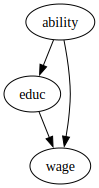

In [28]:
g =\
(
    gr
    .Digraph()
)

g.edge("ability", "educ")
g.edge("ability", "wage")
g.edge("educ", "wage")
g

One way to avoid this is to control for constant levels of ability when measuring the effect of education on wage. We could do that by including ability in our linear regression model. However, we don't have good measurements of ability. The best we have are some very questionable proxies, like IQ.

But all is not lost. Here is where Instrumental Variables enters the picture. The idea of IV is to find another variable that causes the treatment and it is only correlated with the outcome through the treatment. Another way of saying this is that this instrument $Z_i$ is uncorrelated with $Y_0$, but it is correlated with $T$. This is sometimes referred to as the exclusion restriction.

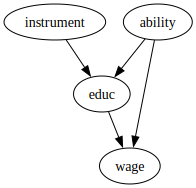

In [29]:
g =\
(
    gr
    .Digraph()
)

g.edge("ability", "educ")
g.edge("ability", "wage")
g.edge("educ", "wage")
g.edge("instrument", "educ")
g

If we have such a variable, we can recover the causal effect $\kappa$ with what we will see as the IV formula. To do so, let's think about the ideal equation we want to run. Using more general terms like $T$ for the treatment and $W$ for the confounders, here is want we want:

$
Y_i = \beta_0 + \kappa \ T_i + \pmb{\beta}W_i + u_i
$

However, we don't have data on $W$, so all we can run is

$
Y_i = \beta_0 + \kappa\ T_i + v_i
$

$
v_i = \pmb{\beta}W_i + u_i
$

Since $W$ is a confounder, $\mathrm{Cov}(T, v) \neq 0$. We have a short, not long equation. In our example, this would be saying that ability is correlated with education. If this is the case, running the short regression would yield a biased estimator for $\kappa$ due to omitted variables. 

Now, behold the magic of IV! Since the instrument Z is only correlated with the outcome through T, this implies that $\mathrm{Cov}(Z,v) = 0$, otherwise there would be a second path from Z to Y through W. With this in mind, we can write

$
\mathrm{Cov}(Z,Y) = \mathrm{Cov}(Z,\beta_0 + \kappa\ T_i + v_i) = \kappa \mathrm{Cov}(Z,T) + \mathrm{Cov}(Z, v) = \kappa \mathrm{Cov}(Z,T)
$

Dividing each side by $V(Z_i)$ and rearranging the terms, we get

$
\kappa = \dfrac{\mathrm{Cov}(Y_i, Z_i)/V(Z_i)}{\mathrm{Cov}(T_i, Z_i)/V(Z_i)} = \dfrac{\text{Reduced Form}}{\text{1st Stage}} 
$

Notice that both the numerator and the denominator are regression coefficients (covariances divided by variances). The numerator is the result from the regression of Y on Z. In other words, it's the "impact" of Z on Y. Remember that this is not to say that Z causes Y, since we have a requirement that Z impacts Y only through T. Rather, it is only capturing how big is this effect of Z on Y through T. This numerator is so famous it has its own name: the reduced form coefficient.

The denominator is also a regression coefficient. This time, it is the regression of T on Z. This regression captures what is the impact of Z on T and it is also so famous that it is called the 1st Stage coefficient. 

Another cool way to look at this equation is in terms of partial derivatives. We can show that the impact of T on Y is equal to the impact of Z on Y, scaled by the impact of Z on T:

$
\kappa = \dfrac{\frac{\partial y}{\partial z}}{\frac{\partial T}{\partial z}} = \dfrac{\partial y}{\partial z} * \dfrac{\partial z}{\partial T} =  \dfrac{\partial y}{\partial T}
$

What this is showing to us is more subtle than most people appreciate. It is also cooler than most people appreciate. By writing IV like this, we are saying, "look, it's hard to find the impact of T on Y due to confounders. But I can easily find the impact of Z on Y, since there is nothing that causes Z and Y (exclusion restriction). However, I'm interested in the impact of T on Y, not Z on Y. So, I'll estimate the easy effect of Z on Y and **scale it by the effect of Z on T**, to convert the effect to T units instead of Z units". 

We can also see this in a simplified case where the instrument is a dummy variable. In this case, the IV estimator gets further simplified by the ratio between 2 differences in means.

$
\kappa = \dfrac{E[Y|Z=1]-E[Y|Z=0]}{E[T|Z=1]-E[T|Z=0]}
$

This ratio is sometimes referred to as the **Wald Estimator**. Again, we can tell the IV story where we want the effect of T on Y, which is hard to get. So we focus on the effect of Z on Y, which is easy. By definition, Z only affects Y through T, so we can now convert the impact of Z on Y to the impact of T on Y. We do so by scaling the effect of Z on Y by the effect of Z on T. 

## Quarter of Birth and the Effect of Education on Wage

So far, we've been treating these instruments as some magical variable $Z$ which have the miraculous propriety of only affecting the outcome through the treatment. To be honest, good instruments are so hard to come by that we might as well consider them miracles. Let's just say it is not for the faint of heart. Rumor has it that the cool kids at Chicago School of Economics talk about how they come up with this or that instrument at the bar. 

Still, we do have some interesting examples of instruments to make things a little more concrete. We will again try to estimate the effect of education on wage. To do so, we will use the person's quarter of birth as the instrument Z.

This idea takes advantage of US compulsory attendance law. Usually, they state that a kid must have turned 6 years by January 1 of the year they enter school. For this reason, kids that are born at the beginning of the year will enter school at an older age. Compulsory attendance law also requires students to be in school until they turn 16, at which point they are legally allowed to drop out. The result is that people born later in the year have, on average, more years of education than those born in the beginning of the year.

If we accept that quarter of birth is independent of the ability factor, that is, it does not confound the impact of education on wage, we can use it as an instrument. In other words, we need to believe that quarter of birth has no impact on wage, other than through its impact on education. If you don't believe in astrology, this is a very compelling argument.

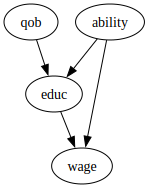

In [30]:
g =\
(
    gr
    .Digraph()
)

g.edge("ability", "educ")
g.edge("ability", "wage")
g.edge("educ", "wage")
g.edge("qob", "educ")
g

> To perform this analysis, we can use data from three decennial census, the same data used by [Angrist and Krueger](https://economics.mit.edu/faculty/angrist/data1/data/angkru1991) in their article about IV.

> This dataset has information on log wages, our outcome variable, and years of schooling, our treatment variable. It also has data on quarter of birth, our instrument, and additional controls, such as year of birth and state of birth. 

In [31]:
data =\
(
    pd
    .read_csv("https://talktoroh.squarespace.com/s/ak91-6n3a.csv")
)

data.head()

,log_wage,years_of_schooling,year_of_birth,quarter_of_birth,state_of_birth
0,5.790019,12.0,30.0,1.0,45.0
1,5.952494,11.0,30.0,1.0,45.0
2,5.315949,12.0,30.0,1.0,45.0
3,5.595926,12.0,30.0,1.0,45.0
4,6.068915,12.0,30.0,1.0,37.0


## The 1st Stage

Before we use quarter of birth as an instrument, we need to make sure it is a valid one. This implies arguing in favor of the two Instrumental Variables assumptions:

1. $\mathrm{Cov}(Z, T) \neq 0$. This is saying that we should have a strong 1st stage, or that the instrument indeed impacts the treatment variable.
2. $Y \perp Z | T $. This is the exclusion restriction, stating that the instrument Z only affects the outcome Y through the treatment T. 

The first assumption is fortunately verifiable. We can see from data that $\mathrm{Cov}(Z, T)$ is not zero. In our example, if quarter of birth is indeed an instrument like we've said, we should expect individuals born in the last quarter of the year to have slightly more time of education than those born in the beginning of the year. Before running any statistical test to verify this, let's just plot our data and see it with our own eyes.

In [32]:
group_data =\
(
    data
    .groupby(["year_of_birth", "quarter_of_birth"])
    [["log_wage", "years_of_schooling"]]
    .mean()
    .reset_index()
    .assign(time_of_birth = lambda d: d["year_of_birth"] + (d["quarter_of_birth"]) / 4)
)

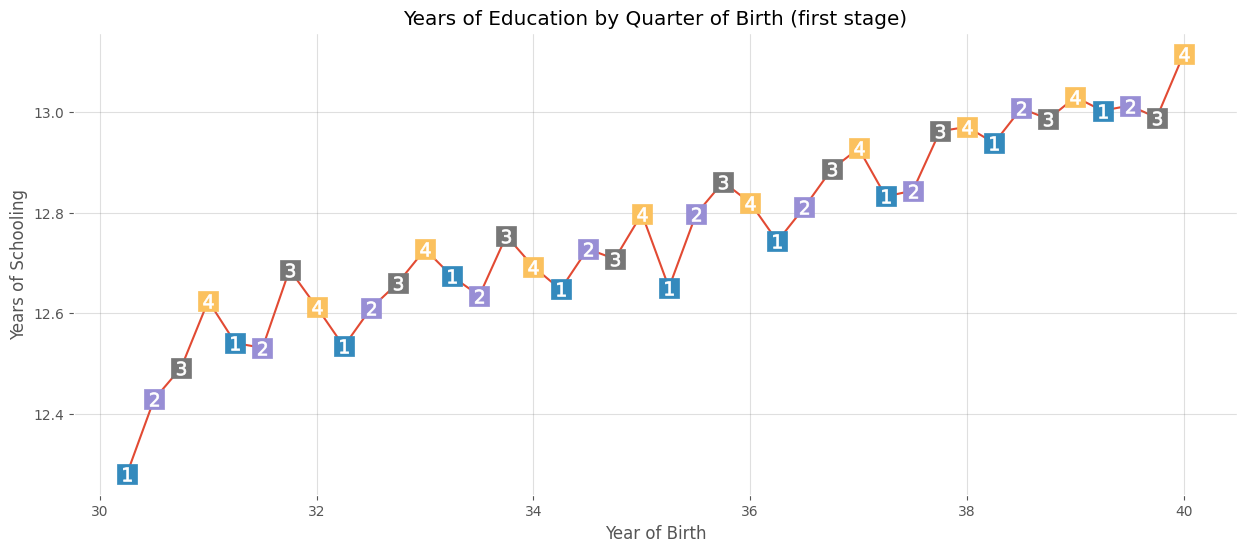

In [33]:
plt.figure(figsize=(15,6))
plt.plot(group_data["time_of_birth"], group_data["years_of_schooling"], zorder=-1)
for q in range(1, 5):
    x = group_data.query(f"quarter_of_birth=={q}")["time_of_birth"]
    y = group_data.query(f"quarter_of_birth=={q}")["years_of_schooling"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Years of Education by Quarter of Birth (first stage)")
plt.xlabel("Year of Birth")
plt.ylabel("Years of Schooling");

Remarkably, there is a seasonal pattern on the years of schooling that follows the quarter of the year. Visually, we can see that those born in the first quarter of the year have almost always less education than those born in the last quarter (once we control for the year of birth, after all, those born in later years have more education, in general).

To be a bit more rigorous, we can run the 1st stage as a linear regression. We will first convert the quarter of birth to dummy variables:

In [34]:
factor_data = data.assign(**{f"q{int(q)}": (data["quarter_of_birth"] == q).astype(int)
                             for q in data["quarter_of_birth"].unique()})

factor_data.head()

,log_wage,years_of_schooling,year_of_birth,quarter_of_birth,state_of_birth,q1,q2,q3,q4
0,5.790019,12.0,30.0,1.0,45.0,1,0,0,0
1,5.952494,11.0,30.0,1.0,45.0,1,0,0,0
2,5.315949,12.0,30.0,1.0,45.0,1,0,0,0
3,5.595926,12.0,30.0,1.0,45.0,1,0,0,0
4,6.068915,12.0,30.0,1.0,37.0,1,0,0,0


For simplicity, let's only use the last quarter, q4, as the instrument for now. We will run a regression of years of schooling, the treatment, on quarter of birth, the instrument. This will show us if indeed quarter of birth positively affects time of education like we saw in the plot above. We also need to control for years of birth here and we will add state of birth as an additional control.

In [35]:
first_stage = smf.ols("years_of_schooling ~ C(year_of_birth) + C(state_of_birth) + q4", data=factor_data).fit()

print("q4 parameter estimate:, ", first_stage.params["q4"])
print("q4 p-value:, ", first_stage.pvalues["q4"])

q4 parameter estimate:,  0.10085809272783847
q4 p-value:,  5.464829416674665e-15


It looks like those born in the last quarter of the year have, on average, 0.1 more years of education than those born in other quarters of the year. The p-value is close to zero. This closes the case on whether quarter of birth causes more or less years of schooling.

## The Reduced Form

Unfortunately, we can't verify the second IV condition. We can only argue in favor of it. We can express our belief that quarter of birth does not influence potential earnings. In other words, the time people are born is not an indication of their personal ability or any other factor that can cause a difference in earnings, other than the effect on education. A good way of doing that is to say that the quarter of birth is as good as randomly assigned when we are thinking about it's impact on earnings. (It isn't random. There is evidence that people tend to conceive around the end of the summer or around some sort of holiday. But I can't think of any good reason that this pattern also affects income in any way other than through education).

Having argued in favor of the exclusion restriction, we can proceed to run the reduced form. The reduced form aims at figuring out how the instrument influences the outcome. Since, by assumption, all this influence is due to the effect on treatment, this will shed some light into how the treatment affects the outcome. Once again, let's evaluate this visually before getting serious with regression. 

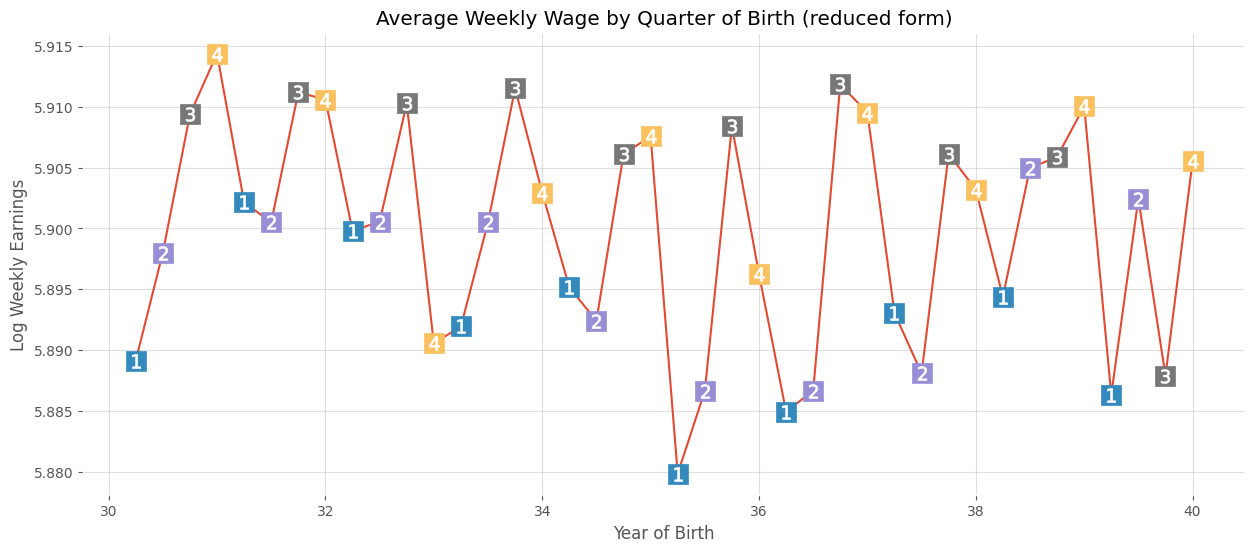

In [36]:
plt.figure(figsize=(15,6))
plt.plot(group_data["time_of_birth"], group_data["log_wage"], zorder=-1)
for q in range(1, 5):
    x = group_data.query(f"quarter_of_birth=={q}")["time_of_birth"]
    y = group_data.query(f"quarter_of_birth=={q}")["log_wage"]
    plt.scatter(x, y, marker="s", s=200, c=f"C{q}")
    plt.scatter(x, y, marker=f"${q}$", s=100, c=f"white")

plt.title("Average Weekly Wage by Quarter of Birth (reduced form)")
plt.xlabel("Year of Birth")
plt.ylabel("Log Weekly Earnings");

Once again, we can see a seasonal pattern on earnings by the quarter of birth. Those born later on the year have slightly higher income than those born in the beginning of the year. To test this hypothesis, we will again regress the instrumental q4 on log wage. We will also add the same additional controls as in the 1st stage:

In [37]:
reduced_form = smf.ols("log_wage ~ C(year_of_birth) + C(state_of_birth) + q4", data=factor_data).fit()

print("q4 parameter estimate:, ", reduced_form.params["q4"])
print("q4 p-value:, ", reduced_form.pvalues["q4"])

q4 parameter estimate:,  0.008603484260132598
q4 p-value:,  0.0014949127183784244


Once again, we have a significant result. Those born in the last quarter of the year have, on average, 0.8% higher wages. This time, the p-value is not so close to zero as before, but it's still pretty significant, being just 0.0015. 

## Instrumental Variables by Hand

Having both our reduced form and our 1st stage, we can now scale the effect of the first stage by the reduced form. Since the first stage coefficient was something like 0.1, this will multiply the effect of the reduced form coefficient by almost 10. This will give us our unbiased IV estimate of the average causal effect:

$
\mathrm{ATE}_{IV} = \dfrac{\text{Reduced Form}}{\text{1st Stage}} 
$

In [38]:
reduced_form.params["q4"] / first_stage.params["q4"]

np.float64(0.0853028649208027)

This means that we should expect each additional year of school to increase wages by 8%.

Another way to get the IV estimates is by using 2 stages least squares, **2SLS**. With this procedure, we do the first stage like before and then run a second stage where we replace the treatment variable by the fitted values of the 1st stage

$
\mathrm{educ}_i = \gamma_0 + \gamma_1 \times \mathrm{q4}_i + \gamma_2\times \mathrm{yob}_i + \gamma_3\times \mathrm{sob}_i + v_i
$

$
\log(\mathrm{wage})_i = \beta_0 + \beta_1\times \mathrm{educ}_i + \beta_2\times \mathrm{yob}_i + \beta_3\times \mathrm{sob}_i + u_i
$

$
\log(\mathrm{wage})_i = \beta_0 + \beta_1 [\gamma_0 + \gamma_1 \times \mathrm{q4}_i + \gamma_2\times \mathrm{yob}_i + \gamma_3\times \mathrm{sob}_i + v_i ]  + \beta_2\times \mathrm{yob}_i + \beta_3\times \mathrm{sob}_i + u_i
$

One thing to notice is that **any additional control we add to the second stage should also be added to the first stage when doing IV**. 

In [39]:
iv_by_hand = smf.ols("log_wage ~ C(year_of_birth) + C(state_of_birth) + years_of_schooling_fitted",
                     data=factor_data.assign(years_of_schooling_fitted=first_stage.fittedvalues)).fit()

iv_by_hand.params["years_of_schooling_fitted"]

np.float64(0.08530286492084713)

As you can see, the parameters are exactly the same. This second way of looking at IV can be useful for the intuition it gives. In 2SLS, the first stage creates a new version of the treatment that is purged from omitted variable bias. We then use this purged version of the treatment, the fitted values of the 1st stage, in a linear regression.  

In practice, however, we don't do IV by hand. Not because it is troublesome, but because the standard errors we get from this second stage are a bit off. Instead, we should always let the machine do the job for us. In Python, we can use the library [linearmodels](https://bashtage.github.io/linearmodels/) to run 2SLS the right way.

The formula for 2SLS is a bit different. We should add the first stage between \[ \] inside the formula. In our case, we add `years_of_schooling ~ q4`. Additional controls don't need to be added to the first stage because the computer will do this automatically if we include them in the second stage. For this reason, we add `year_of_birth` and `state_of_birth` outside the formula of the 1st stage. 

In [40]:
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [41]:
from linearmodels.iv import IV2SLS

def parse(model, exog="years_of_schooling"):
    param = model.params[exog]
    se = model.std_errors[exog]
    p_val = model.pvalues[exog]
    print(f"Parameter: {param}")
    print(f"SE: {se}")
    print(f"95 CI: {(-1.96*se,1.96*se) + param}")
    print(f"P-value: {p_val}")
    
formula = 'log_wage ~ 1 + C(year_of_birth) + C(state_of_birth) + [years_of_schooling ~ q4]'
iv2sls = IV2SLS.from_formula(formula, factor_data).fit()
parse(iv2sls)

Parameter: 0.08530286494351458
SE: 0.025540812810713024
95 CI: [0.035 0.135]
P-value: 0.0008381914621753417


Once again, we can see that the parameter is exactly the same as the ones we've got before. The extra benefit is that we have valid standard errors now. With this at hand, we can say that we expect 1 extra year of education to increase wages by 8.5%, on average. 

## Multiple Instruments

Another advantage of using the computers is to run 2SLS is that it is easy to add multiple instruments. In our example, we will use all quarter of birth dummies as instruments for years of schooling. 

In [42]:
formula = 'log_wage ~ 1 + C(year_of_birth) + C(state_of_birth) + [years_of_schooling ~ q1+q2+q3]'
iv_many_zs = IV2SLS.from_formula(formula, factor_data).fit()
parse(iv_many_zs)

Parameter: 0.10769370490743313
SE: 0.019557149007653582
95 CI: [0.069 0.146]
P-value: 3.657974656512408e-08


With all 3 dummies, the estimated return on education is now 0.1, which means that we should expect a 10% average increase on earnings for every additional year of education. Let's compare this with the traditional OLS estimate. To do that, we can use 2SLS again, but without the 1st stage now.

In [43]:
formula = "log_wage ~ years_of_schooling + C(state_of_birth) + C(year_of_birth) + C(quarter_of_birth)"
ols = IV2SLS.from_formula(formula, data=data).fit()
parse(ols)

Parameter: 0.06732572817659932
SE: 0.00038839984390486487
95 CI: [0.067 0.068]
P-value: 0.0


The return on education is estimated to be lower with OLS than with 2SLS. This suggests that OVB might not be as strong as we first though. Also, notice the confidence intervals. 2SLS has a much wider CI than the OLS estimate. Let's explore this further

## Weakness of Instruments

When dealing with IV, we need to remember we are estimating the ATE indirectly. Our estimates depend on both the first stage and the second stage. If the impact of the treatment on the outcome is indeed strong, the second stage will also be strong. However, it doesn't matter how strong the second stage is if we have a weak first stage. A weak first stage means that the instrument has only a very small correlation with the treatment. Therefore, we can't learn much about the treatment from the instrument.

The formulas for the IV standard errors are a bit complex and not so intuitive, so we will try something else to grasp this problem. We will simulate data where we have a treatment T with effect 2.0 on the outcome Y, an unobserved confounder U and an additional control X. We will also simulate multiple instruments with different strengths on the 1st stage.

$
X \sim N(0, 2^2)\\
U \sim N(0, 2^2)\\
T \sim N(1+0.5U, 5^2)\\
Y \sim N(2+ X - 0.5U + 2T, 5^2)\\
Z \sim N(T, \sigma^2) \text{ for }\sigma^2 \text{ in 0.1 to 100}
$

In [44]:
np.random.seed(12)
n = 10000
X = np.random.normal(0, 2, n) # observable variable
U = np.random.normal(0, 2, n) # unobservable (omitted) variable
T = np.random.normal(1 + 0.5*U, 5, n) # treatment
Y = np.random.normal(2 + X - 0.5*U + 2*T, 5, n) # outcome

stddevs = np.linspace(0.1, 100, 50)
Zs = {f"Z_{z}": np.random.normal(T, s, n) for z, s in enumerate(stddevs)} # instruments with decreasing \mathrm{Cov}(Z, T)

sim_data = pd.DataFrame(dict(U=U, T=T, Y=Y)).assign(**Zs)

sim_data.head()

,U,T,Y,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,...,Z_40,Z_41,Z_42,Z_43,Z_44,Z_45,Z_46,Z_47,Z_48,Z_49
0,2.696148,8.056988,18.388910,8.233315,9.028779,16.430365,7.348864,4.848165,1.567900,16.654138,...,50.836515,-121.965878,-9.118833,-42.297891,17.015717,51.777219,78.678074,-164.581598,-117.798705,-13.485292
1,2.570240,0.245067,2.015052,0.455988,-0.901285,-6.442245,-2.824902,7.327944,-9.643833,14.237652,...,29.966537,141.855092,79.040440,66.249629,-23.107153,25.007034,-73.621303,85.867339,-209.727577,-70.792948
2,0.664741,5.597510,11.939170,5.528384,6.148148,10.141348,18.923875,-5.550785,4.495364,-14.070897,...,-29.051441,14.537511,-95.846490,-117.922132,43.194916,58.534855,119.820024,-173.513340,60.562232,47.619414
3,1.037725,0.493532,-5.077869,0.382075,0.790127,-2.753808,3.146698,-7.152174,-6.322238,9.209916,...,-61.446478,26.719702,-40.753912,63.725307,22.462409,97.200099,-116.309759,-26.328707,78.136513,-108.322304
4,-2.590591,-6.263014,-6.460508,-6.197533,-5.954731,-19.295207,-11.343303,-7.231806,5.556399,-17.913401,...,-28.071993,146.111732,-21.991256,88.258432,62.211154,-72.066362,51.848504,-117.858043,78.776566,-80.547214


Just to double check, we can see that the correlation between Z and T is indeed decreasing.

In [45]:
corr = (sim_data.corr()["T"]
        [lambda d: d.index.str.startswith("Z")])

corr.head()

Z_0    0.999807
Z_1    0.919713
Z_2    0.773434
Z_3    0.634614
Z_4    0.523719
Name: T, dtype: float64

Now, we will run one IV model per instrument we have and collect both the ATE estimate and the standard error.

In [46]:
se = []
ate = []
for z in range(len(Zs)):
    formula = f'Y ~ 1 + X + [T ~ Z_{z}]'
    iv = IV2SLS.from_formula(formula, sim_data).fit()
    se.append(iv.std_errors["T"])
    ate.append(iv.params["T"])

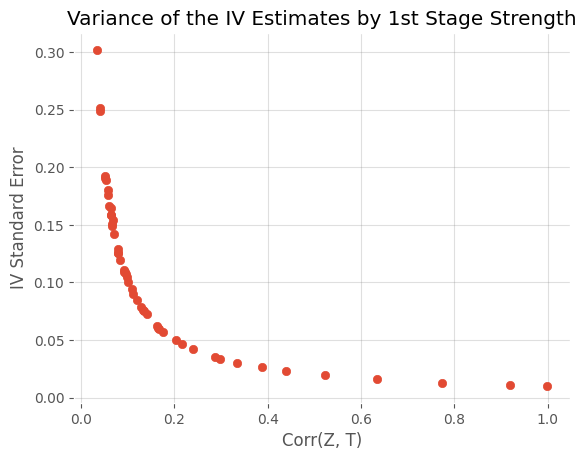

In [47]:
plot_data = pd.DataFrame(dict(se=se, ate=ate, corr=corr)).sort_values(by="corr")

plt.scatter(plot_data["corr"], plot_data["se"])
plt.xlabel("Corr(Z, T)")
plt.ylabel("IV Standard Error");
plt.title("Variance of the IV Estimates by 1st Stage Strength");

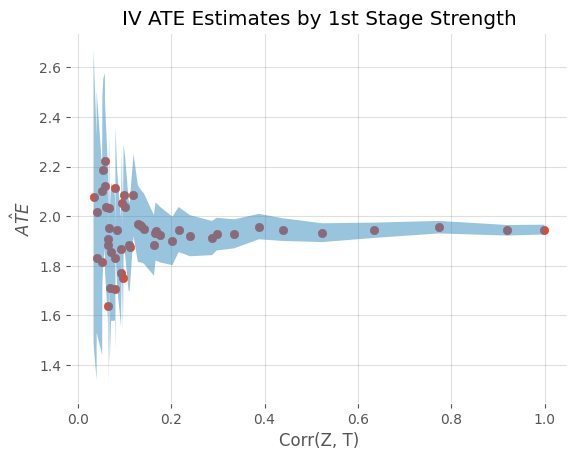

In [48]:
plt.scatter(plot_data["corr"], plot_data["ate"])
plt.fill_between(plot_data["corr"],
                 plot_data["ate"]+1.96*plot_data["se"],
                 plot_data["ate"]-1.96*plot_data["se"], alpha=.5)
plt.xlabel("Corr(Z, T)")
plt.ylabel("$\hat{ATE}$");
plt.title("IV ATE Estimates by 1st Stage Strength");

As we can see in the plots above, estimates vary wildly when the correlation between T and Z is weak. This is because the SE also increases a lot when the correlation is low.

Another thing to notice is that **2SLS is biased**! Even with high correlation, the parameter estimate still does not reach the true ATE of 2.0. Actually, 2.0 is not even in the 95% CI! 2SLS is only consistent, which means that it approaches the true parameter value if the sample size is big enough. However, we can't know how big is big enough. We can only stick to some rules of thumb to understand how this bias behaves:

1. 2SLS is biased towards OLS. This means that if OLS has a negative/positive bias, 2SLS will also have it. The advantage of 2SLS is that it is at least consistent, where OLS is not, in the case of omitted variables. In the example above, our unobserved U impacts negatively the outcome but its positively correlated with the treatment, which will result in a negative bias. That is why we are seeing the ATE estimate below the true value (negative bias).

2. The bias will increase with the number of instruments we add. If we add too many instruments, 2SLS becomes more and more like OLS.

Besides knowing how this bias behaves, a final piece of advice is to avoid some **common mistakes when doing IV**:

1. Doing IV by hand. As we've seen, IV by hand will result in wrong standard errors, even if the parameter estimates are right. The SE won't be completely off. Still, why do it if you can use software and get the right SE?

2. Using anything other than OLS on the 1st stage. Lots of Data Scientist encounter IV and think they can do better. For example, they see a dummy treatment and think about replacing the 1st stage by a logistic regression, after all, they are predicting a dummy variable, right?. The problem is that this is plain wrong. The consistency of IV relies on a property that only OLS can give, which is the orthogonality of the residuals, so anything different than OLS on the 1st stage will yield something biased. (OBS: there are some modern techniques that use Machine Learning for IV, but their results have been, at best, questionable).

## Key Ideas

We've taken some time here to understand how we can work around omitted variable bias if we have an instrument variable. An instrument is a variable that is correlated with the treatment (has a first stage), but only affects the outcome through the treatment (exclusion restriction). We saw an example of an instrument with quarter of birth to estimate the effect of education on income.

We then delve into the mechanics of estimating the causal effect with IV, namely, using 2SLS. We've also learned that IV is no silver bullet. It can be quite troublesome when we have a weak first stage. Also, although consistent, 2SLS is still a biased method to estimate the causal effect.

## <a id = "p4">4.</a>  <font color = "green"> What We Learned & What's Next </font>  [back to table of contents](#top)

> Tonight, we learned how to use instrumental variables to answer causal inference questions in applied settings.

> Let me further illustrate this by highlighting specific examples of how instrumental variables (IV) can be used in the fields of finance and real estate to address endogeneity issues and obtain more accurate causal estimates.

## The Use Cases of Instrumental Variables (IV)

### Finance in general

#### Case 1: Impact of Interest Rates on Investment Decisions

* Context: Understanding how interest rates influence corporate investment decisions is crucial for policymakers and investors. However, endogeneity issues arise because investment decisions can also influence interest rates, creating a two-way causality.

* Instrument: Regulatory changes in monetary policy or central bank policy rates that are independent of individual firm characteristics.

* Application: Suppose we want to estimate the causal effect of interest rates on corporate investment. We could use changes in the central bank's policy rates as an instrument for interest rates. These policy changes are likely to be exogenous to individual firms' investment decisions but correlated with the general level of interest rates in the economy. By using these policy changes as an instrument, we can isolate the exogenous variation in interest rates and accurately estimate their impact on investment decisions.

#### Case 2: Effect of Corporate Governance on Firm Performance

* Context: Researchers and investors are interested in how corporate governance practices, such as board structure or shareholder rights, impact firm performance. However, firms with better performance might also adopt better governance practices, leading to reverse causality.

* Instrument: Legal reforms or changes in corporate governance regulations that affect all firms within a jurisdiction but are unrelated to individual firms' performance.

* Application: To estimate the causal effect of corporate governance on firm performance, we could use legal reforms that mandate changes in governance practices as an instrument. For instance, a new law requiring a certain proportion of independent directors on boards can serve as an exogenous instrument. This reform is likely to affect all firms equally regardless of their prior performance, providing a source of variation in governance practices that is independent of firm performance. Using this instrument, we can obtain an unbiased estimate of the impact of corporate governance on performance metrics such as return on assets or stock returns.

### Real Estate

#### Case 1: Effect of Housing Prices on Mortgage Default Rates

* Context: Understanding the relationship between housing prices and mortgage default rates is critical for financial stability and housing market policy. However, endogeneity arises because economic conditions that influence housing prices might also affect borrowers' ability to repay mortgages.

* Instrument: Proximity to new infrastructure projects or natural experiments such as changes in zoning laws.

* Application: To estimate the causal effect of housing prices on mortgage default rates, we could use proximity to new infrastructure projects (e.g., new highways or public transit lines) as an instrument. These projects can lead to exogenous changes in local housing prices due to improved accessibility and increased demand for housing in the area. By using the distance to these projects as an instrument, we can isolate the impact of exogenous changes in housing prices on the likelihood of mortgage defaults.

#### Case 2: Impact of Urban Development Projects on Local Property Values

* Context: Urban development projects, such as the construction of parks, commercial centers, or public transit systems, are expected to influence local property values. However, property values might also affect the decision to undertake these projects, leading to endogeneity.

* Instrument: Historical preservation status or legislative decisions on urban development that are independent of current property values.

* Application: To estimate the impact of urban development projects on local property values, we could use the historical preservation status of neighborhoods or legislative decisions on urban development as instruments. For example, if certain areas are designated for development based on historical criteria or political decisions, these designations can serve as exogenous instruments. They are likely to affect property values through the anticipated improvements in infrastructure and amenities but are not directly influenced by current property values. Using these instruments, we can accurately estimate the effect of urban development projects on property values.

    REVISION NOTE

    - Revision pointer A

    - Revision pointer B

    - Revision pointer C

> `Thank you for working with the script, Team 👍`